In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
import logging

logging.basicConfig(stream=sys.stdout, level=logging.INFO)

# Test
logger = logging.getLogger()

In [4]:
import string

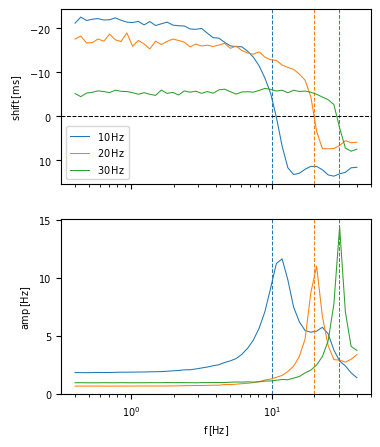

In [14]:
save_dir = '../data'
exp_name = 'frequency_response'
exp_ids = ['001', '003', '004']

# target mean output rate
exp_r0 = [10, 20, 30]

N = len(exp_ids)

fontsize = 7
plot_kw = {'lw': 0.75}


fig, axs = plt.subplots(2, 1, figsize=(4, 5), sharex=True)
for i_exp, exp_id in enumerate(exp_ids):
    
    with open(os.path.join(save_dir, exp_name, exp_id, 'results.p'), 'rb') as tmp:
        data = pickle.load(tmp)

    fs = data['frequencies']
    shifts = data['shifts']
    amps = data['amplitudes']
    
    for ax in axs:
        ax.axvline(exp_r0[i_exp], color=plt.colormaps['tab10'](i_exp), ls='--', **plot_kw)
    
    ax = axs[0]
    ax.plot(fs, shifts*1e3, label=r'${}$'.format(exp_r0[i_exp]) + r'$\,\rm Hz$', **plot_kw)
    
    ax = axs[1]
    ax.plot(fs, amps, **plot_kw)

# advance defined as negative shift
yticks = [-10, 0, 10, 20]
axs[0].set_yticks(yticks, [r'${}$'.format(-yt) for yt in yticks])

axs[1].set_yticks([0, 5, 10, 15])

axs[0].set_ylabel(r'$\rm shift\,[ms]$', size=fontsize)
axs[1].set_ylabel(r'$\rm amp\,[Hz]$', size=fontsize)
axs[1].set_xlabel(r'$\rm f\,[Hz]$', size=fontsize)

for ax in axs.reshape(-1):
    ax.set_xscale('log')
    ax.tick_params(labelsize=fontsize)

axs[0].legend(fontsize=fontsize)

axs[0].axhline(0, ls='--', c='k', **plot_kw)

save_path = 'Fig-A3_frequency_response_input_dependency'
# plt.savefig(save_path + '.pdf', dpi=300)